Load and Inspect Data:

In [2]:
import pandas as pd
df = pd.read_csv(r'/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


2.Data Preprocessing:

Converting Data Types:

In [6]:
#Check what column types we have
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [7]:
#Convert to categorical columns
df['Certificate'] = df['Certificate'].astype('category')
df['Genre'] = df['Genre'].astype('category')

In [8]:
#Convert 'released_year' to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [9]:
df['Gross'] = df['Gross'].str.replace(',', '')  # Remove commas
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')  # Convert to numeric

In [10]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')  # Remove 'min' string
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')  # Convert to numeric

In [11]:
df.dtypes #check

Poster_Link        object
Series_Title       object
Released_Year     float64
Certificate      category
Runtime             int64
Genre            category
IMDB_Rating       float64
Overview           object
Meta_score        float64
Director           object
Star1              object
Star2              object
Star3              object
Star4              object
No_of_Votes         int64
Gross             float64
dtype: object

Data cleaning

In [12]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

We can observe the missing values in 3 columns

In [14]:
df['Certificate'] = df['Certificate'].cat.add_categories('Unknown') #add new category
df['Certificate'].fillna('Unknown', inplace=True) #fill missing values in non-numeric column

In [15]:
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True) #fill with mean in meta_score column
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

In [16]:
df.isnull().sum() #check

Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Rating Trends Over Years:

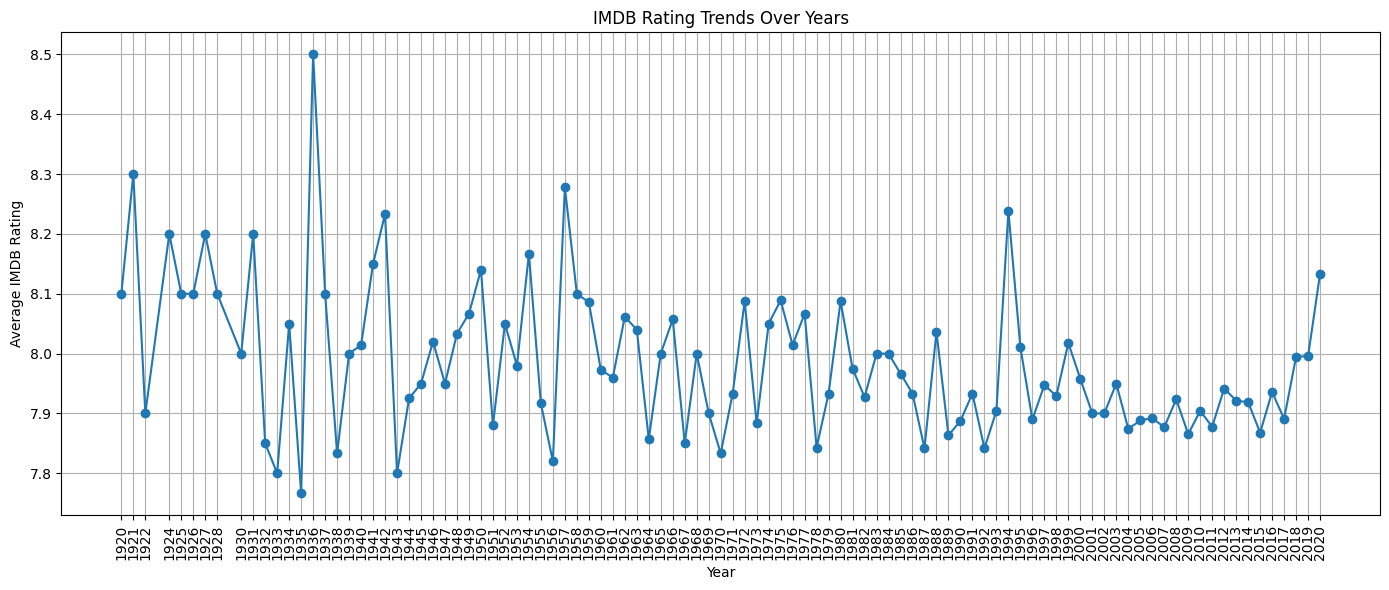

In [20]:
import matplotlib.pyplot as plt

# Grouping data by 'Released_Year' and calculating the mean IMDB rating for each year
rating_trends = df.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(14, 6))
plt.plot(rating_trends.index, rating_trends.values, marker='o', linestyle='-')

plt.title('IMDB Rating Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.xticks(rating_trends.index)
plt.tight_layout()
plt.show()

Genre Popularity Analysis

In [22]:
df['Genre'].value_counts() # check what genres we have

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Action, Crime, Mystery        1
Crime, Drama, Sci-Fi          1
Animation, Crime, Mystery     1
Animation, Drama, Romance     1
Crime, Drama, Horror          1
Name: Genre, Length: 202, dtype: int64

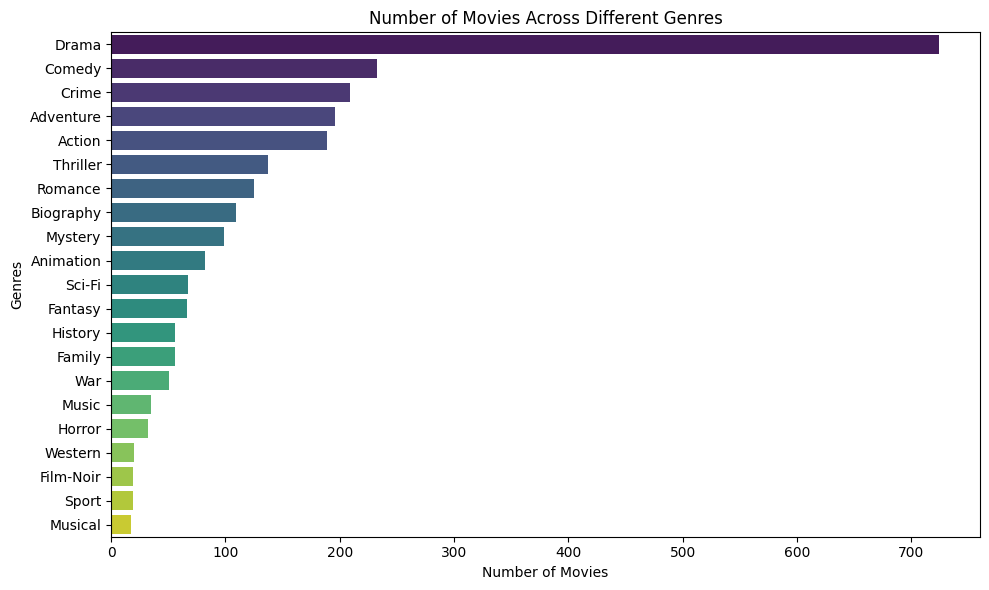

In [23]:
# Splitting genres and stacking them into separate rows
genre_split = df['Genre'].str.split(', ').explode()

# Counting occurrences of each genre
genre_counts = genre_split.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

In [27]:
df['Director'].value_counts() # check how many directors we have

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

In [29]:
df['IMDB_Rating'].value_counts()

7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

Due to a large number of directors, I desided to check the directors with minimum 5 series

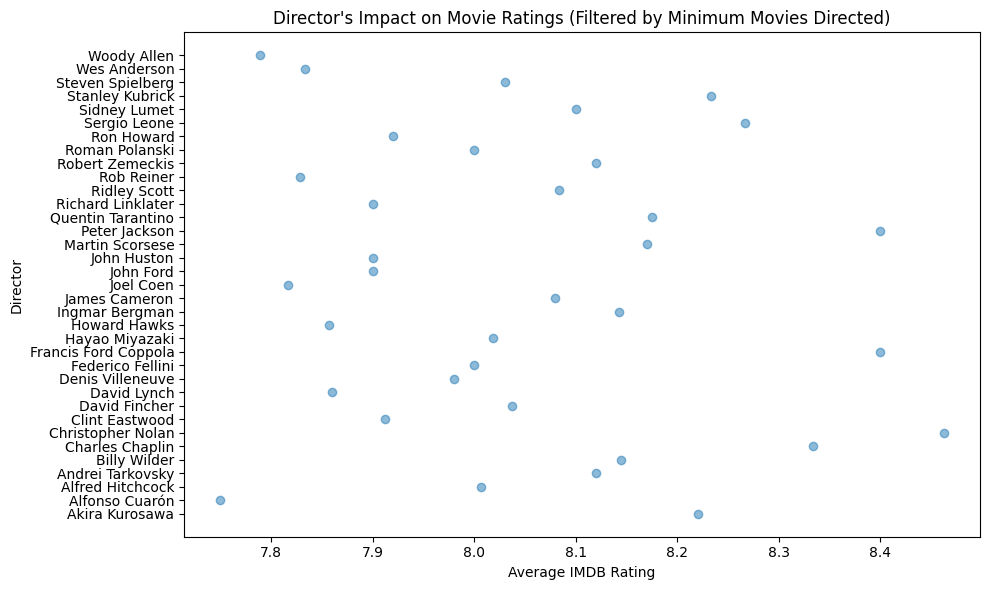

In [35]:
director_movie_count = df['Director'].value_counts()
min_movies = 5  # Minimum number of movies directed by a director

# Filtering directors based on the minimum number of movies
filtered_directors = director_movie_count[director_movie_count >= min_movies]

# Subsetting the original dataframe for movies directed by filtered directors
filtered_df = df[df['Director'].isin(filtered_directors.index)]

# Calculating the mean IMDB rating for each director after filtering
director_ratings = filtered_df.groupby('Director')['IMDB_Rating'].mean()


plt.figure(figsize=(10, 6))
plt.scatter(director_ratings.values, director_ratings.index, alpha=0.5)
plt.title('Director\'s Impact on Movie Ratings (Filtered by Minimum Movies Directed)')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

Star Power Analysis:

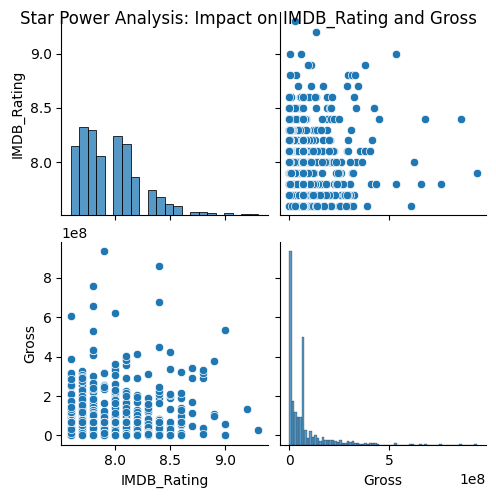

In [49]:
import seaborn as sns

# Selecting relevant columns
stars_and_ratings = df[['IMDB_Rating', 'Gross', 'Star1', 'Star2', 'Star3', 'Star4']]

# Creating a pairplot
sns.pairplot(stars_and_ratings, hue=None, kind='scatter')
plt.suptitle('Star Power Analysis: Impact on IMDB_Rating and Gross')
plt.show()

Box Plot of Genres vs. Ratings:

In [62]:
df['Genre'].unique()

['Drama', 'Crime, Drama', 'Action, Crime, Drama', 'Action, Adventure, Drama', 'Biography, Drama, History', ..., 'Action, Adventure, Family', 'Action, Crime, Mystery', 'Animation, Drama, Romance', 'Drama, War, Western', 'Adventure, Comedy, War']
Length: 202
Categories (202, object): ['Action, Adventure', 'Action, Adventure, Biography',
                           'Action, Adventure, Comedy', 'Action, Adventure, Crime', ...,
                           'Mystery, Sci-Fi, Thriller', 'Mystery, Thriller', 'Thriller', 'Western']

Due to 202 unique genre combination, I desided to check the top 20 most frequent genres

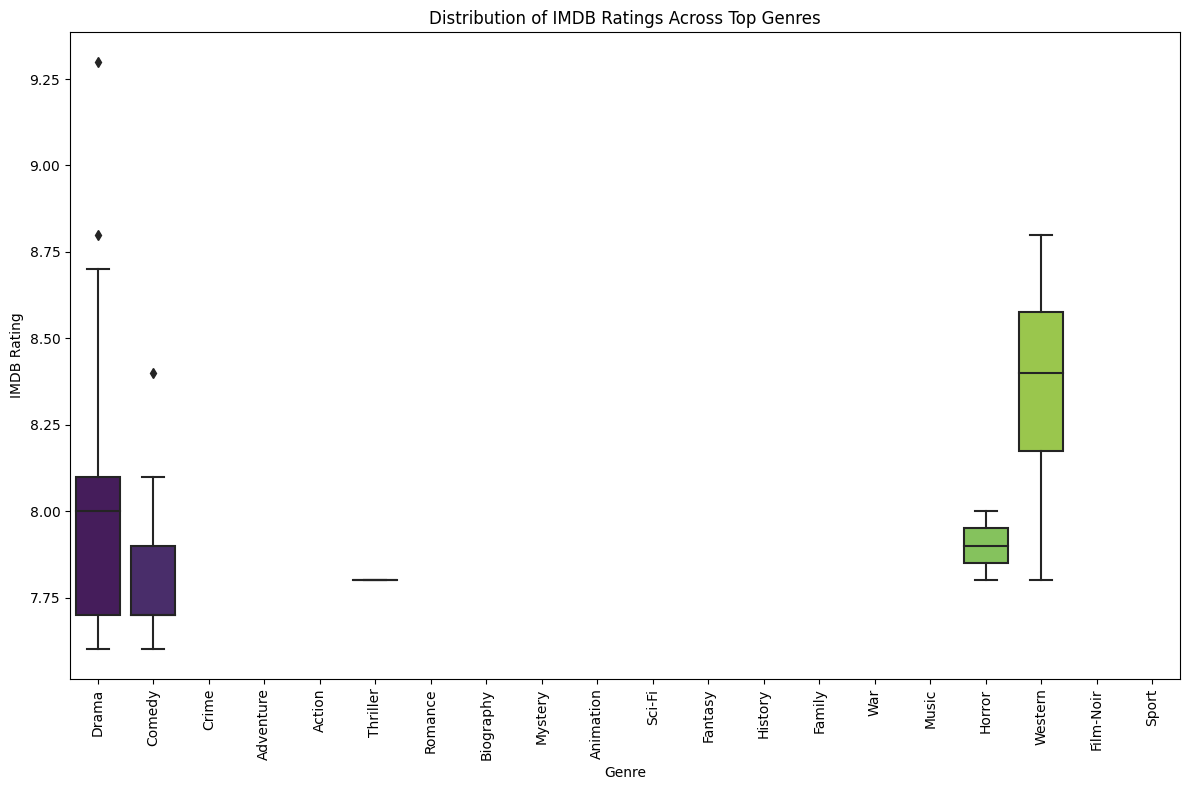

In [78]:
genre_split = df['Genre'].str.split(', ').explode()

# Counting the occurrences of each genre
genre_counts = genre_split.value_counts()

# Selecting the top 100 most frequent genres
top_n_genres = genre_counts.head(20).index

# Filtering the DataFrame for movies containing the top genres
df_top_genres = df[df['Genre'].apply(lambda x: any(genre in x for genre in top_n_genres))]

# Creating a box plot for IMDB_Rating across top 20 genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df_top_genres, order=top_n_genres, palette='viridis')
plt.title('Distribution of IMDB Ratings Across Top Genres')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Correlation Heatmap

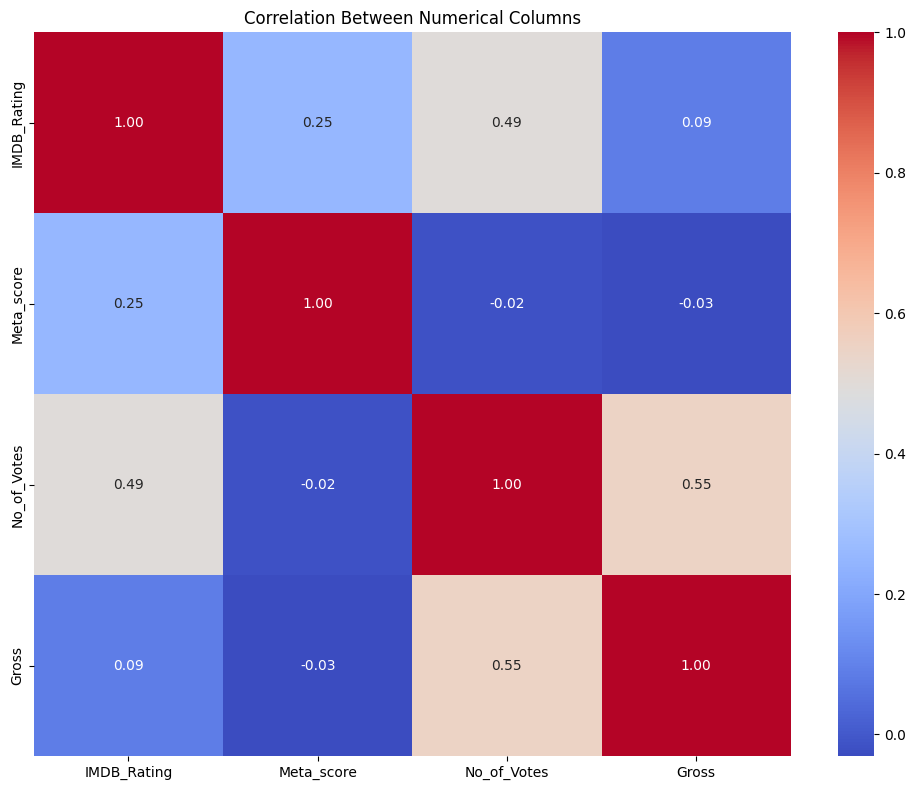

In [79]:
numerical_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Creating a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Creating a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Between Numerical Columns')
plt.tight_layout()
plt.show()